In [3]:
import sys
import os
sys.path.append(os.path.abspath('../..'))


# from scan_engine.status_fields_config_24summ import STATUS_FIELDS_CONFIG
from status_fields_config_oct3v1_brws_250430 import STATUS_FIELDS_CONFIG

from utlis.scan_engine_utlis.scan_eng_big_utlis import log_folder_to_parquet_sep

if __name__ == "__main__":
    base_folder = '/data/big_rim/rsync_dcc_sum/25Apri_social' #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1" #"/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ"  # Replace with your base folder
    # save_path = os.path.join(base_folder, 'paret')
    failed_paths_file = None #'/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/sync_failed_brws.txt'  # File containing failed paths

    force_rescan_rec_files = [
        # ('2023-10-01', '001'),
        # ('2023-10-02', '002'),
        # Add more as needed
    ]
    rescan_threshold_days = 0.001 # 7 days, but guess if i mess up i can just change it to automatically rescan all, smile... #0.1

    log_folder_to_parquet_sep(base_folder, failed_paths_file, STATUS_FIELDS_CONFIG,
                              force_rescan_rec_files=force_rescan_rec_files,
                              rescan_threshold_days=rescan_threshold_days)


No new or modified folders to scan.


In [4]:
sys.path.append(os.path.abspath('../..'))
from utlis.scan_engine_utlis.scan_engine_utlis import read_all_parquet_files
# base_folder = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1"
all_df = read_all_parquet_files(base_folder)

In [5]:
import pyarrow.compute as pc
table = all_df #combined_df
# Filter mir_generate_param == 0 and sync != 3
filter_mask = pc.and_(
    pc.equal(table['com'], '1'),
    pc.not_equal(table['sync'], '3')
)

# Apply the filter and print the results
filtered_table = table.filter(filter_mask)

# Print each row of the filtered table
print(filtered_table.to_pandas())  # This will display the filtered data in a familiar pandas-like format


  mir_generate_param sync mini_6cam_map dropf_handle com social miniscope  \
0                  1    1             0            0   1      1         0   
1                  1    1             0            0   1      1         0   
2                  1    1             0            0   1      1         0   
3                  1    1             0            0   1      1         0   
4                  1    1             0            0   1      1         0   
5                  1    1             0            0   1      1         0   

  test after_oxytocin before_oxytocin dannce mini_rec_sync  \
0    0              0               1      1             0   
1    0              0               1      1             0   
2    0              0               1      0             0   
3    0              0               1      0             0   
4    0              0               1      0             0   
5    0              0               1      0             0   

                        r

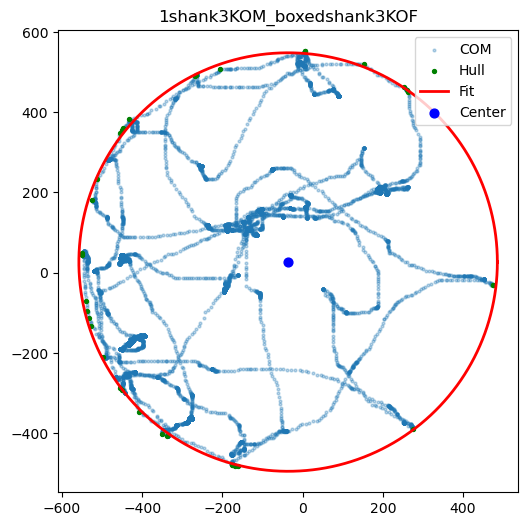

Saved COM circle plot to:
  /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF/vis/com_circle.png


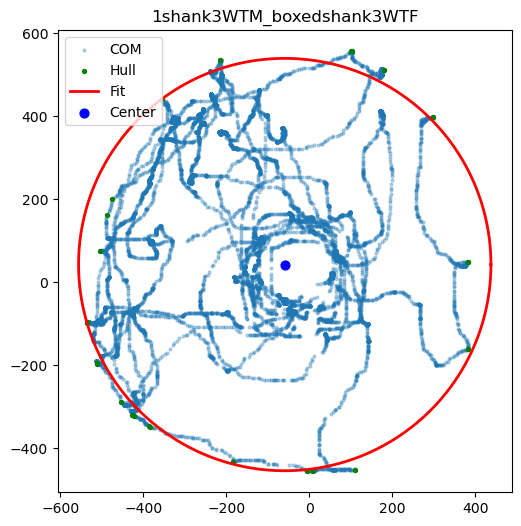

Saved COM circle plot to:
  /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF/vis/com_circle.png
Primary COM file not found; using fallback: /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_13/1shank3KOM1034_boxedshank3KOF/COM/predict00/com3d0.mat


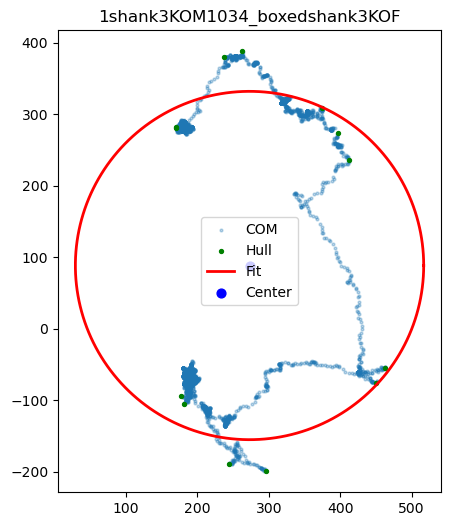

Saved COM circle plot to:
  /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_13/1shank3KOM1034_boxedshank3KOF/vis/com_circle.png
Primary COM file not found; using fallback: /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_13/1shank3KOM1035_boxedshank3KOF/COM/predict00/com3d0.mat


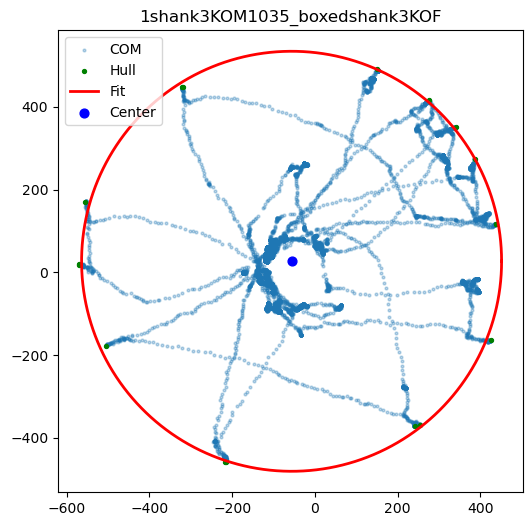

Saved COM circle plot to:
  /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_13/1shank3KOM1035_boxedshank3KOF/vis/com_circle.png
Primary COM file not found; using fallback: /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_13/1shank3KOM1037_boxedshank3KOF/COM/predict00/com3d0.mat


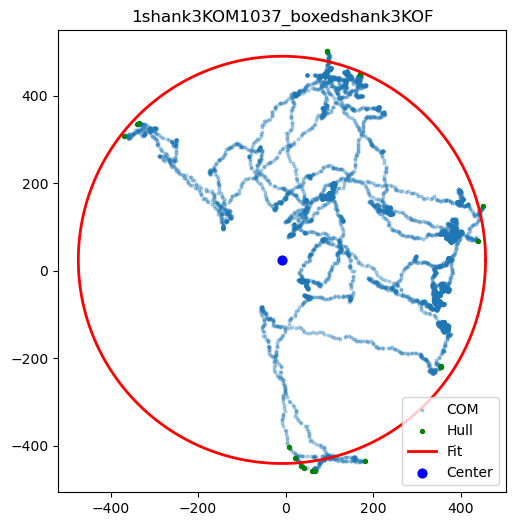

Saved COM circle plot to:
  /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_13/1shank3KOM1037_boxedshank3KOF/vis/com_circle.png
Primary COM file not found; using fallback: /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_13/1shank3WTM1045_boxedshank3WTF/COM/predict00/com3d0.mat


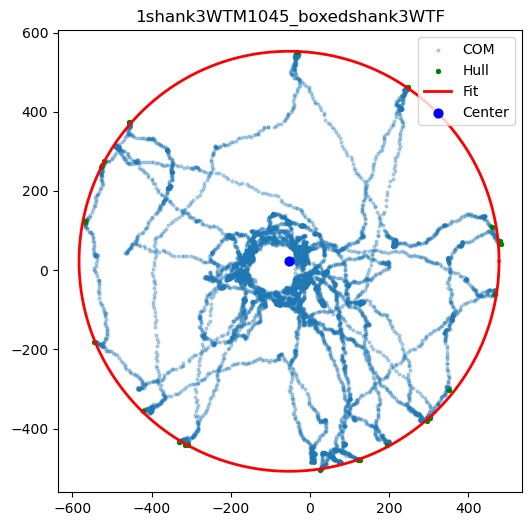

Saved COM circle plot to:
  /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_13/1shank3WTM1045_boxedshank3WTF/vis/com_circle.png


In [9]:
# from utlis.vis_valid_utlis.com_trace import plot_com_circle_for_path

# rec_paths = filtered_table.column('rec_path').to_pylist()

# # 3. Loop through and plot
# for path in rec_paths:
#     try:
#         plot_com_circle_for_path(path)
#     except Exception as e:
#         print(f"❌ Failed on {path!r}: {e}")

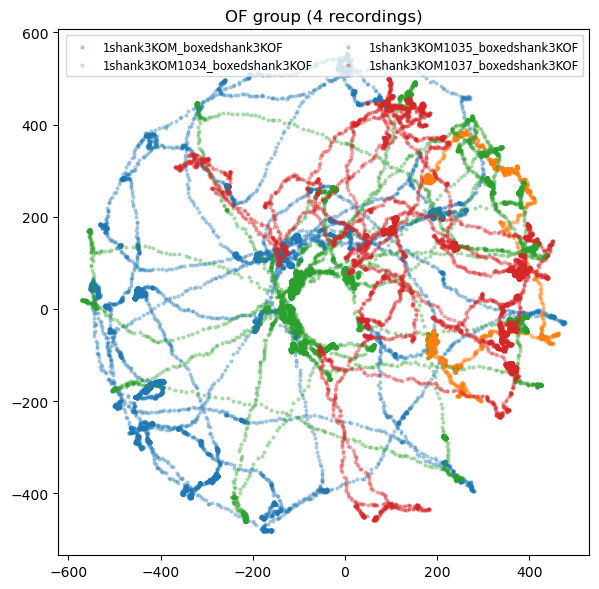

✔️ Saved OF plot to /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3KOM_boxedshank3KOF/vis/OF_combined.png


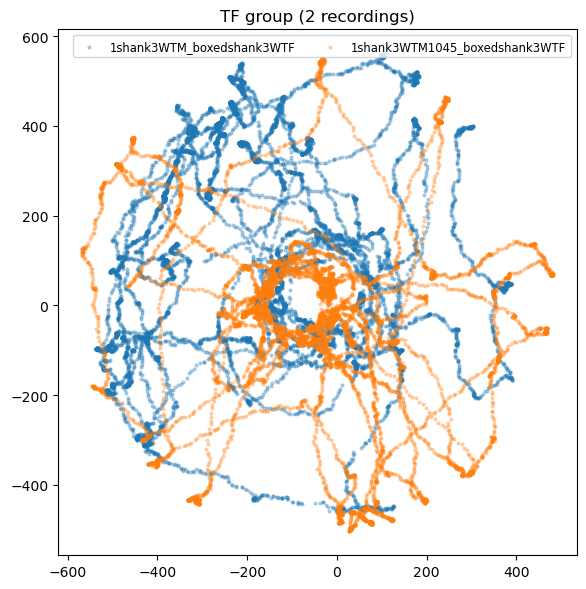

✔️ Saved TF plot to /data/big_rim/rsync_dcc_sum/25Apri_social/2025_05_02/1shank3WTM_boxedshank3WTF/vis/TF_combined.png


In [8]:
from utlis.vis_valid_utlis.com_trace import plot_group_com


# 1. pull out your two columns
rec_paths = filtered_table.column('rec_path').to_pylist()
rec_files = filtered_table.column('rec_file').to_pylist()

# 2. split into two lists
of_paths = [p for p, f in zip(rec_paths, rec_files) if f.endswith('OF')]
tf_paths = [p for p, f in zip(rec_paths, rec_files) if f.endswith('TF')]
plot_group_com(of_paths, 'OF')
plot_group_com(tf_paths, 'TF')